# LeR complete examples of BNS events (O4 design sensitivity)

* I am using Amplitude Spectral Density (asds) included in [bilby](https://github.com/lscsoft/bilby/tree/master/bilby) package; L1:'aLIGO_O4_high_asd.txt', 'H1': 'aLIGO_O4_high_asd.txt', 'V1': 'AdV_asd.txt'

* LeR by default set the mass range (detector frame) $M_{tot}$=[2.0, 200.0], for the SNR calculation

* I will change it to $M_{tot}$=[1.0, 100.0], as the default source $m_1^{max}=2.3$ and so the maximum detector frame $M_{tot}$ can be $M_{tot}^{max}*(1+z_{max})\sim 51$. Here $z_{max}=10$.

* I will consider both **sup** and **sub** events for the BNS events, where
    * sup: super-threshold evevnts, SNR>8
    * sub: sub+super-threshold evevnts, SNR>6

## Models Considered

### Mass model: BNS mass distribution: Bimodal Gaussian Model

Refer to this sub-section of the LeR documentation for more details: [Default BNS mass model](https://ler.readthedocs.io/en/latest/GW_events.html#BNS-mass-distribution:-Bimodal-Gaussian-Model)

### Merger rate density model: BBH (population I/II star) merger-rate density [WIERDA et al. 2021](https://arxiv.org/pdf/2106.06303.pdf)

Refer to this sub-section of the LeR documentation for more details: [Default BNS red-shift distribution](https://ler.readthedocs.io/en/latest/GW_events.html#Merger-Rate-Density-Formula)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ler.rates import LeR
from ler.utils import get_param_from_json

##  Un-lensed events

In [36]:
ler = LeR(verbose=False, event_type='BNS', mtot_max=51, z_max=10)

### Sup

In [21]:
# snr_cut=8.0
ler.selecting_n_unlensed_detectable_events(size=1000, batch_size=100000,snr_threshold=8.0, output_jsonfile='n_unlensed_detectable_bns.json', meta_data_file='n_unlensed_detectable_bns_meta.json', resume=True);

collected number of detectable events =  1000
storing detectable unlensed params in ./ler_data/n_unlensed_detectable_bns.json

 trmming final result to size=1000


In [26]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bns_meta.json')
meta_data.keys()

dict_keys(['events_total', 'detectable_events', 'total_rate'])

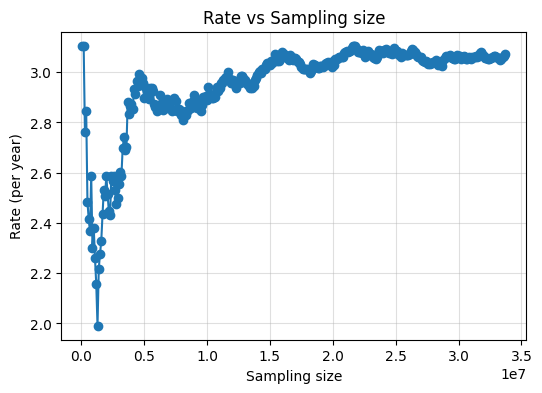

In [27]:
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [31]:
# select only events after sampling size of 2.3e7
idx = np.where(meta_data['events_total'] > 2.3e7)[0]
# take average of the rate after 2.3e7
rate = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate)

Rate (per year) = 3.0621442247433555


* Conclusion is, you will need at-least 30 million samples to get a good estimate of detection rate for BNS events.

* You can get away with lesser sample if you set z_max=5, but that is not a realistic scenario.

* Rate obtained from the simulation (super-threshold) is ~3.06 detectable BNS events per year.

### Sub

In [24]:
# snr_cut=6.0
ler.selecting_n_unlensed_detectable_events(size=1000, batch_size=100000,snr_threshold=6.0, output_jsonfile='n_unlensed_detectable_bns_sub.json', meta_data_file='n_unlensed_detectable_bns_sub_meta.json', resume=True);

collected number of detectable events =  1000
storing detectable unlensed params in ./ler_data/n_unlensed_detectable_bns_sub.json

 trmming final result to size=1000


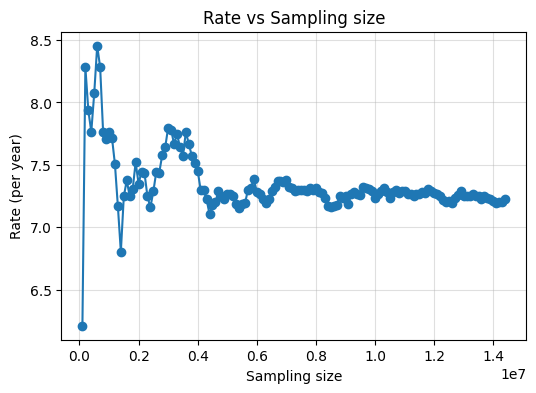

In [32]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bns_sub_meta.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [33]:
# select only events after sampling size of 1e7
idx = np.where(meta_data['events_total'] > 1e7)[0]
# take average of the rate after 1e7
rate = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate)

Rate (per year) = 7.254233879342404


* Rate obtained from the simulation (sub+super-threshold) is ~7.25 detectable BNS events per year.

* This is 2.37 times higher than the rate obtained from the super-threshold events. 

## Lensed events

In [ ]:
ler = LeR(verbose=False, event_type='BNS', mtot_max=51, z_max=10)

In [ ]:
# snr_cut=8.0
ler.selecting_n_lensed_detectable_events(size=1000, batch_size=100000,snr_threshold=8.0, num_img=2, output_jsonfile='n_unlensed_detectable_bns.json', meta_data_file='n_unlensed_detectable_bns_meta.json', resume=True);